In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [2]:
df=pd.read_csv('spam.tsv',sep='\t',header=None)
df.columns=['Label','Message']
df.head()

,Label,Message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!!


### Checking for Null Values

In [3]:
# Checking for null values
df.isnull().sum()

Label      0
Message    0
dtype: int64

### Checking Data Imbalance

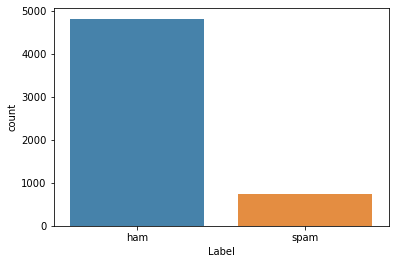

In [70]:
sns.countplot(x=df.Label,alpha=0.9)
plt.show()

In [12]:
length=[]
for i,x in enumerate(df.Message):
    length.append(len(x))
df['Length']=length

df.head()

,Label,Message,Length
0,ham,I've been searching for the right words to tha...,196
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,"Nah I don't think he goes to usf, he lives aro...",61
3,ham,Even my brother is not like to speak with me. ...,77
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!!,36


In [19]:
ham=df[df['Label']=='ham'].sample(746)
print(ham.shape)
spam=df[df['Label']=='spam']
print(spam.shape)

(746, 3)
(746, 3)


In [38]:
balanced_df=pd.concat([ham,spam],ignore_index=True)
balanced_df

,Label,Message,Length
0,ham,U meet other fren dun wan meet me ah... Muz b ...,59
1,ham,"Aight that'll work, thanks",26
2,ham,Oops my phone died and I didn't even know. Yea...,65
3,ham,&lt;#&gt; mins but i had to stop somewhere f...,51
4,ham,He didn't see his shadow. We get an early spri...,52
...,...,...,...
1487,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90
1488,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158
1489,spam,Had your contract mobile 11 Mnths? Latest Moto...,160
1490,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147


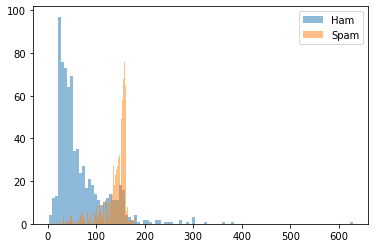

In [25]:
# Checking if there is a size difference in the length of ham and spam messages

plt.hist(ham.Length,bins=100,alpha=0.5,label='Ham')
plt.hist(spam.Length,bins=100,alpha=0.5,label='Spam')
plt.legend()
plt.show()

# Spam messages are generally longer in length 

### Vectorization

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

from sklearn.pipeline import Pipeline

In [41]:
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(balanced_df.Message)
x=x.toarray()

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,balanced_df.Label,test_size=0.2,random_state=5,stratify=balanced_df.Label)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1193, 4498) (299, 4498) (1193,) (299,)


### Training Your First Test Classifier

#### SVM

In [56]:
model1=SVC()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)



In [57]:
confusion_matrix(y_test,y_pred)

array([[148,   1],
       [  9, 141]], dtype=int64)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.94      0.99      0.97       149
        spam       0.99      0.94      0.97       150

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299



#### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
model=RandomForestClassifier(n_estimators=50, n_jobs=-1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)



In [54]:
confusion_matrix(y_test,y_pred)

array([[147,   2],
       [ 10, 140]], dtype=int64)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.94      0.99      0.96       149
        spam       0.99      0.93      0.96       150

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



### Checking If Model Works well

In [61]:
def predict(x):
    x = tfidf.transform([x])
    x = x.toarray()
    return model1.predict(x)

In [63]:
predict('Hi , How are you !')

array(['ham'], dtype=object)

In [64]:
predict('You won 500 $ !')

array(['spam'], dtype=object)